In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from termcolor import colored

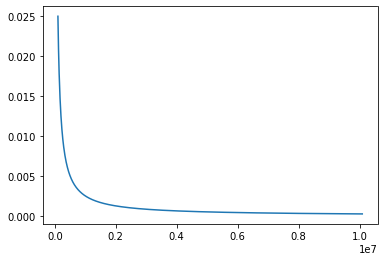

In [8]:
T = 300 # K
pressoes = [(1+x/10)*1e5 for x in range(0, 1000)] # Pa
pressoes = pressoes[:]
n = 1 # mol
R = 8.314 # J/mol/K

volume = lambda P, T = T, n = n, R = R: n*R*T/P
volumes = list(map(volume, pressoes)) 

plt.plot(pressoes, volumes)

In [62]:
def calculaVolumes(temperaturas, pressoes):
    
    volumes = []
    for T in temperaturas:
        linha = []        
        
        for P in pressoes:
            volume = n*R*T/P 
            volume *= 1000 #conversão m³ p/ L.
            volume = round(volume, 1)           
            linha.append(volume)
        
        volumes.append(linha)
    
    return volumes

In [60]:
temperaturas = [300 + 3*x for x in range(1, 101)][::5] # K
temperaturas = [300 + 3*x/5 for x in range(1, 1001)][0:-1:5] # K
temperaturas += [1000 + 3*x for x in range(1, 101)][::5] # K
temperaturas[50:] = [500 + 4*x for x in range(1, 101)]
pressoes = [1e5*(1+ x/100) for x in range(1, 301)][2::4] # Pa
n = 1 # mol
R = 8.314 # J/mol/K 

temperaturas[-1] = 2500#K

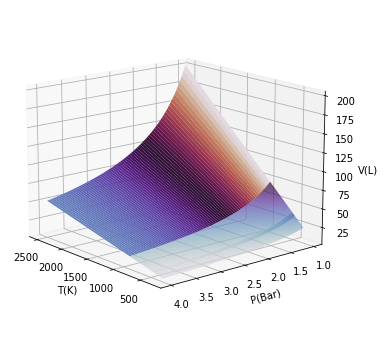

In [61]:
temperaturas_grid, pressoes_grid = np.meshgrid(temperaturas, pressoes)
volumes_grid = np.array(calculaVolumes(temperaturas, pressoes)).T

fig = plt.figure(figsize=(20,6))    
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
p1 = ax1.plot_surface(temperaturas_grid, pressoes_grid/1e5, volumes_grid, cmap=mpl.cm.twilight, rstride=1, cstride=1, linewidth=0)
ax1.set_xlabel('T(K)')
ax1.set_ylabel('P(Bar)')
ax1.set_zlabel('V(L)')
ax1.view_init(15, 140)

In [65]:
def prettyPrintMatrix(matriz, sliceLinhas = [0, 0], sliceColunas = [0, 0]):

    prettyMatrix = ''

    for i in range(len(matriz)):
        linha = matriz[i]
        if i != 0:
            prettyMatrix += '\n'

        if i == 0:
            for j in range(len(linha)):
                prettyMatrix += 'P ' + str(j) + '\t'
            prettyMatrix += '\n'

        for j in range(len(linha)):
            elemento = matriz[i][j]
            elemento = round(elemento, 1)
            elemento = str(elemento)

            if (i >= sliceLinhas[0] and i < sliceLinhas[1] and
                j >= sliceColunas[0] and j < sliceColunas[1]):
                elemento = colored(elemento, 'red')

            prettyMatrix += elemento + '\t'           

        prettyMatrix += 'T ' + str(i)

    print(prettyMatrix)

In [76]:
temperaturas = [300 + 3*x for x in range(1, 100)][::10] # K
pressoes = [1e5*x for x in range(1, 100)][::10] # Pa
n = 1 # mol
R = 8.314 # J/mol/K 
volumes = calculaVolumes(temperaturas, pressoes)
prettyPrintMatrix(volumes, [0, 4], [1, 6])

P 0	P 1	P 2	P 3	P 4	P 5	P 6	P 7	P 8	P 9	
25.2	2.3	1.2	0.8	0.6	0.5	0.4	0.4	0.3	0.3	T 0
27.7	2.5	1.3	0.9	0.7	0.5	0.5	0.4	0.3	0.3	T 1
30.2	2.7	1.4	1.0	0.7	0.6	0.5	0.4	0.4	0.3	T 2
32.7	3.0	1.6	1.1	0.8	0.6	0.5	0.5	0.4	0.4	T 3
35.2	3.2	1.7	1.1	0.9	0.7	0.6	0.5	0.4	0.4	T 4
37.7	3.4	1.8	1.2	0.9	0.7	0.6	0.5	0.5	0.4	T 5
40.2	3.7	1.9	1.3	1.0	0.8	0.7	0.6	0.5	0.4	T 6
42.7	3.9	2.0	1.4	1.0	0.8	0.7	0.6	0.5	0.5	T 7
45.1	4.1	2.1	1.5	1.1	0.9	0.7	0.6	0.6	0.5	T 8
47.6	4.3	2.3	1.5	1.2	0.9	0.8	0.7	0.6	0.5	T 9


In [81]:
[ linha[1:6] for linha in volumes[:4]]

[[2.3, 1.2, 0.8, 0.6, 0.5],
 [2.5, 1.3, 0.9, 0.7, 0.5],
 [2.7, 1.4, 1.0, 0.7, 0.6],
 [3.0, 1.6, 1.1, 0.8, 0.6]]